In [1]:
import pandas as pd

cbr_filename = 'new_new_full.csv'
df = pd.read_csv(cbr_filename).drop(columns=['Unnamed: 0'])
df['Отчетная дата'] = pd.to_datetime(df['Отчетная дата'])

# Train

In [2]:
# df['prev_diff'] = df['Просроченная задолженность по кредитам'].diff()
df['y'] = df['Просроченная задолженность по кредитам'].diff().shift(-1)
df

,Отчетная дата,Просроченная задолженность по кредитам,добыча полезных ископаемых,добыча топливно-энергетических полезных ископаемых,обрабатывающие производства,"производство пищевых продуктов, включая напитки, и табака",обработка древесины и производство изделий из дерева,целлюлозно-бумажное производство; издательская и полиграфическая деятельность,"производство кокса, нефтепродуктов и ядерных материалов",химическое производство,...,MIACR_от 181 дн. до 1 года,MOEX_Date,MOEX_Price,MOEX_Open,MOEX_High,MOEX_Low,MOEX_Change %,Date,Inflation,y
0,2009-04-01,346769,3084,1813,69830,23171,3464,1861,381,2475,...,13.47,2009-04-01,920.35,772.93,942.58,758.09,19.07,2009-04-01,13.16,33296.0
1,2009-05-01,380065,4032,1871,74435,24133,3711,1999,672,2615,...,16.33,2009-05-01,1123.38,935.16,1125.59,935.16,22.06,2009-05-01,12.28,29602.0
2,2009-06-01,409667,3235,1967,80603,24110,3984,2156,672,2989,...,11.04,2009-06-01,971.55,1142.63,1226.62,881.79,-13.52,2009-06-01,11.87,18783.0
3,2009-07-01,428450,5346,2732,89104,24647,4178,2046,1192,1587,...,0.00,2009-07-01,1053.30,974.23,1057.41,852.12,8.41,2009-07-01,12.01,49819.0
4,2009-08-01,478269,7519,2067,93343,22821,5309,3447,2056,1980,...,11.50,2009-08-01,1091.98,1059.29,1135.76,1013.82,3.67,2009-08-01,11.60,46498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2022-09-01,3204919,192828,143727,734122,109687,12505,23908,111094,103326,...,0.00,2022-09-01,1957.31,2401.98,2492.15,1841.42,-18.45,2022-09-01,13.67,86086.0
162,2022-10-01,3291005,191972,141595,769237,112301,12642,23962,117724,105958,...,0.00,2022-10-01,2166.61,1991.88,2184.38,1775.04,10.69,2022-10-01,12.63,117875.0
163,2022-11-01,3408880,202082,147825,791008,114216,12727,24398,118648,108232,...,0.00,2022-11-01,2174.53,2179.15,2254.94,2123.32,0.37,2022-11-01,11.97,61435.0
164,2022-12-01,3470315,205046,150226,802172,115044,13313,24119,121362,110042,...,0.00,2022-12-01,2154.12,2189.65,2210.70,2070.58,-0.94,2022-12-01,11.92,68556.0


In [3]:
cols_to_drop = [
        'добыча топливно-энергетических полезных ископаемых',
       'производство прочих неметаллических минеральных продуктов',
       'производство машин и оборудования для сельского и лесного хозяйства',
       'производство автомобилей',
       'сельское хозяйство, охота и предоставление услуг в этих областях',
'строительство зданий и сооружений',
'прочие виды деятельности', 
       'на завершение расчетов',
       ]
df = df.drop(columns=cols_to_drop)

In [4]:
credit_cols = ['Просроченная задолженность по кредитам',
       'добыча полезных ископаемых',
       'добыча топливно-энергетических полезных ископаемых',
       'обрабатывающие производства',
       'производство пищевых продуктов, включая напитки, и табака',
       'обработка древесины и производство изделий из дерева',
       'целлюлозно-бумажное производство; издательская и полиграфическая деятельность',
       'производство кокса, нефтепродуктов и ядерных материалов',
       'химическое производство',
       'производство прочих неметаллических минеральных продуктов',
       'металлургическое производство и производство готовых металлических изделий',
       'производство машин и оборудования',
       'производство машин и оборудования для сельского и лесного хозяйства',
       'производство транспортных средств и оборудования',
       'производство автомобилей',
       'производство и распределение электроэнергии, газа и воды',
       'сельское хозяйство, охота и лесное хозяйство',
       'сельское хозяйство, охота и предоставление услуг в этих областях',
       'строительство', 'строительство зданий и сооружений',
       'транспорт и связь',
       'деятельность воздушного транспорта, подчиняющегося и не подчиняющегося расписанию',
       'оптовая и розничная торговля; ремонт автотранспортных средств, мотоциклов, бытовых изделий и предметов личного пользования',
       'операции с недвижимым имуществом, аренда и предоставление услуг',
       'прочие виды деятельности', 'на завершение расчетов',
       ]
diff_cols = []
for col in credit_cols:
    if col in df.columns:
        diff_cols.append(col)
        df['diff_' + col] = df[col].diff()
df = df.drop(columns=diff_cols)

In [5]:
df.shape

(166, 35)

In [6]:
df.columns

Index(['Отчетная дата', 'MIACR_Дата', 'MIACR_1 день', 'MIACR_от 2 до 7 дн.',
       'MIACR_от 8 до 30 дн.', 'MIACR_от 31 до 90 дн.',
       'MIACR_от 91 до 180 дн.', 'MIACR_от 181 дн. до 1 года', 'MOEX_Date',
       'MOEX_Price', 'MOEX_Open', 'MOEX_High', 'MOEX_Low', 'MOEX_Change %',
       'Date', 'Inflation', 'y', 'diff_Просроченная задолженность по кредитам',
       'diff_добыча полезных ископаемых', 'diff_обрабатывающие производства',
       'diff_производство пищевых продуктов, включая напитки, и табака',
       'diff_обработка древесины и производство изделий из дерева',
       'diff_целлюлозно-бумажное производство; издательская и полиграфическая деятельность',
       'diff_производство кокса, нефтепродуктов и ядерных материалов',
       'diff_химическое производство',
       'diff_металлургическое производство и производство готовых металлических изделий',
       'diff_производство машин и оборудования',
       'diff_производство транспортных средств и оборудования',
       'di

In [7]:
df = df.drop(columns=['MOEX_Open', 'MOEX_High', 'MOEX_Low'])

In [8]:
columns = ['MOEX_Price',
        #    'MOEX_Open', 'MOEX_High', 'MOEX_Low', 
           'diff_Просроченная задолженность по кредитам']

for col_name in columns:
    for period in [2, 6, 12]:
        df[f"{col_name}_diff_{period}"] = df[col_name].shift(period) - df[col_name]
        df[f"{col_name}_median_{period}"] = df[col_name].rolling(period).median()
        df[f"{col_name}_std_{period}"] = df[col_name].rolling(period).std()
        df[f"{col_name}_max_{period}"] = df[col_name].rolling(period).max()
        df[f"{col_name}_min_{period}"] = df[col_name].rolling(period).min()
        df[f"{col_name}_quantile25_{period}"] = df[col_name].rolling(period).quantile(0.25)
        df[f"{col_name}_quantile75_{period}"] = df[col_name].rolling(period).quantile(0.75)


In [9]:
df = df.dropna()
df.shape

(152, 74)

In [10]:
df.iloc[105]

Отчетная дата                                                2019-02-01 00:00:00
MIACR_Дата                                                            2019-02-01
MIACR_1 день                                                                7.59
MIACR_от 2 до 7 дн.                                                          7.6
MIACR_от 8 до 30 дн.                                                         7.3
                                                                    ...         
diff_Просроченная задолженность по кредитам_std_12                       36879.6
diff_Просроченная задолженность по кредитам_max_12                         79820
diff_Просроченная задолженность по кредитам_min_12                        -61847
diff_Просроченная задолженность по кредитам_quantile25_12               -11226.8
diff_Просроченная задолженность по кредитам_quantile75_12                29850.8
Name: 118, Length: 74, dtype: object

In [11]:
date_columns = list(df.columns[df.columns.str.contains('Date')]) + list(
    df.columns[df.columns.str.contains('Дата')]) + list(df.columns[df.columns.str.contains('дата')])

df = df.dropna()


In [12]:
date_columns

['MOEX_Date', 'Date', 'MIACR_Дата', 'Отчетная дата']

In [46]:
from catboost import CatBoostRegressor, Pool

train_size = 105
# val_from = 90

train_pool = Pool(df.iloc[:train_size].drop(columns=['y'] + date_columns), df.iloc[:train_size]['y'] )
# val_pool = Pool(df.iloc[val_from:train_size].drop(columns=['y'] + date_columns), df.iloc[val_from:train_size]['y'] )


test_pool = Pool(df.iloc[train_size:].drop(columns=['y'] + date_columns), df.iloc[train_size:]['y'] )


model = CatBoostRegressor(loss_function='RMSE', 
                          metric_period=300,
                          random_seed=69,
                          learning_rate = 1,
                          depth=2,
                          iterations=7500)



model.fit(train_pool, eval_set=None)
preds = model.predict(test_pool)

0:	learn: 27426.1953383	total: 660us	remaining: 4.95s
300:	learn: 0.0027191	total: 141ms	remaining: 3.37s
600:	learn: 0.0000000	total: 334ms	remaining: 3.83s
900:	learn: 0.0000000	total: 488ms	remaining: 3.57s
1200:	learn: 0.0000000	total: 628ms	remaining: 3.29s
1500:	learn: 0.0000000	total: 769ms	remaining: 3.07s
1800:	learn: 0.0000000	total: 962ms	remaining: 3.04s
2100:	learn: 0.0000000	total: 1.14s	remaining: 2.92s
2400:	learn: 0.0000000	total: 1.3s	remaining: 2.76s
2700:	learn: 0.0000000	total: 1.46s	remaining: 2.59s
3000:	learn: 0.0000000	total: 1.61s	remaining: 2.42s
3300:	learn: 0.0000000	total: 1.77s	remaining: 2.25s
3600:	learn: 0.0000000	total: 1.92s	remaining: 2.08s
3900:	learn: 0.0000000	total: 2.06s	remaining: 1.9s
4200:	learn: 0.0000000	total: 2.2s	remaining: 1.73s
4500:	learn: 0.0000000	total: 2.36s	remaining: 1.57s
4800:	learn: 0.0000000	total: 2.49s	remaining: 1.4s
5100:	learn: 0.0000000	total: 2.63s	remaining: 1.24s
5400:	learn: 0.0000000	total: 2.79s	remaining: 1.08s

33631.94034153225


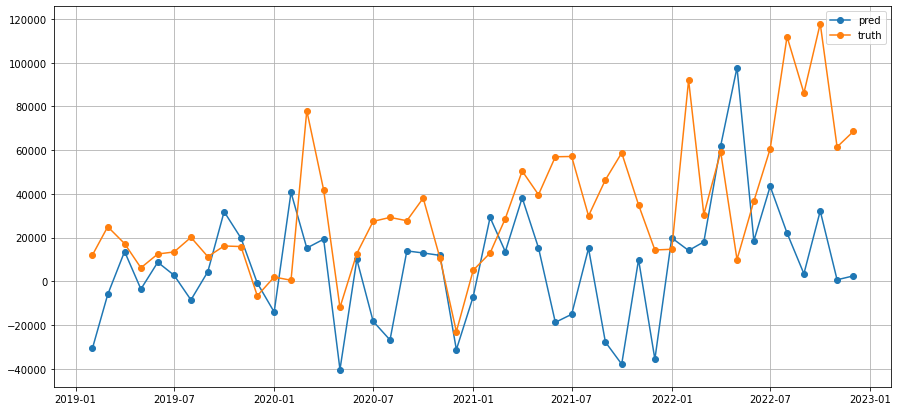

In [47]:
import matplotlib.pyplot as plt

# df.iloc[train_size:]['y'].reset_index(drop=True).plot()
plt.figure(figsize=(15, 7))

plt.plot(df.iloc[train_size:]['Отчетная дата'], preds, 'o-', label='pred')
plt.plot(df.iloc[train_size:]['Отчетная дата'], df.iloc[train_size:]['y'], 'o-', label='truth')
plt.grid()

plt.legend()
print(abs(preds - df.iloc[train_size:]['y'].to_numpy()).mean())


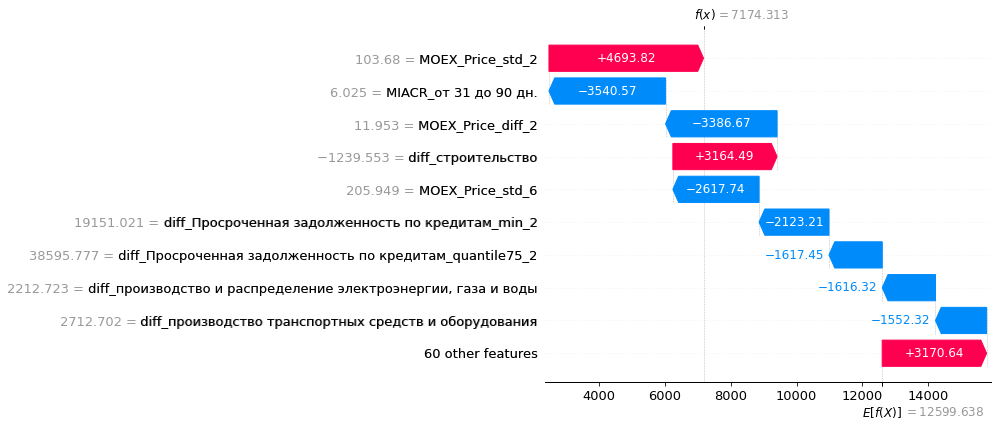

In [48]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(model)
# shap_values = explainer(test_pool.get_features())
shap_values = explainer(df.iloc[train_size:].drop(columns=['y'] + date_columns))

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values.mean(0))


# Random forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

train_size = 105
# val_from = 90

train_pool = Pool(df.iloc[:train_size].drop(
    columns=['y'] + date_columns), df.iloc[:train_size]['y'])
# val_pool = Pool(df.iloc[val_from:train_size].drop(columns=['y'] + date_columns), df.iloc[val_from:train_size]['y'] )


test_pool = Pool(df.iloc[train_size:].drop(
    columns=['y'] + date_columns), df.iloc[train_size:]['y'])



model = RandomForestRegressor(criterion='mae',
                              max_depth=5,
                              n_estimators=1000, 
                              verbose=True
                              )

model.fit(df.iloc[:train_size].drop(columns=['y'] +
                                    date_columns), df.iloc[:train_size]['y'])
preds = model.predict(df.iloc[train_size:].drop(columns=['y'] + date_columns))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


-32977.25575531916


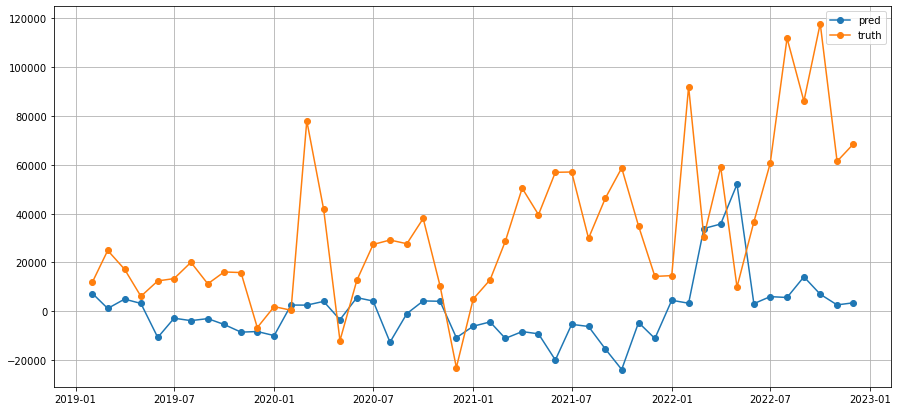

In [51]:
import matplotlib.pyplot as plt

# df.iloc[train_size:]['y'].reset_index(drop=True).plot()
plt.figure(figsize=(15, 7))

plt.plot(df.iloc[train_size:]['Отчетная дата'], preds, 'o-', label='pred')
plt.plot(df.iloc[train_size:]['Отчетная дата'], df.iloc[train_size:]['y'], 'o-', label='truth')
plt.grid()

plt.legend()
print((preds - df.iloc[train_size:]['y'].to_numpy()).mean())
